In [68]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import numpy.linalg as LA
import seaborn as sns
import missingno as msno
from pandas_profiling import ProfileReport
import plotly.offline as offline
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import warnings
warnings.filterwarnings ("ignore")

In [9]:
data = pd.read_csv ("/kaggle/input/country-data/Country-data.csv")
df = pd.DataFrame (data)
features = data.drop('country', axis=1)

In [10]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [11]:
df.describe ().T [['mean']]

,mean
child_mort,38.270060
exports,41.108976
health,6.815689
imports,46.890215
income,17144.688623
inflation,7.781832
life_expec,70.555689
total_fer,2.947964
gdpp,12964.155689


<Axes: >

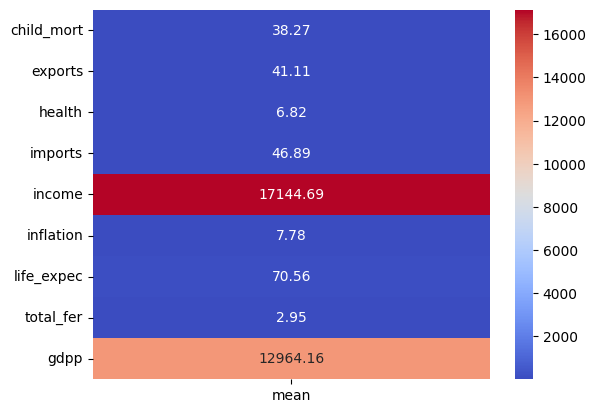

In [12]:
sns.heatmap (df.describe ().T [['mean']], annot = True, cmap = 'coolwarm', fmt = ".2f")

In [13]:
standard_scaler = StandardScaler()
features_scaled = standard_scaler.fit_transform(features)

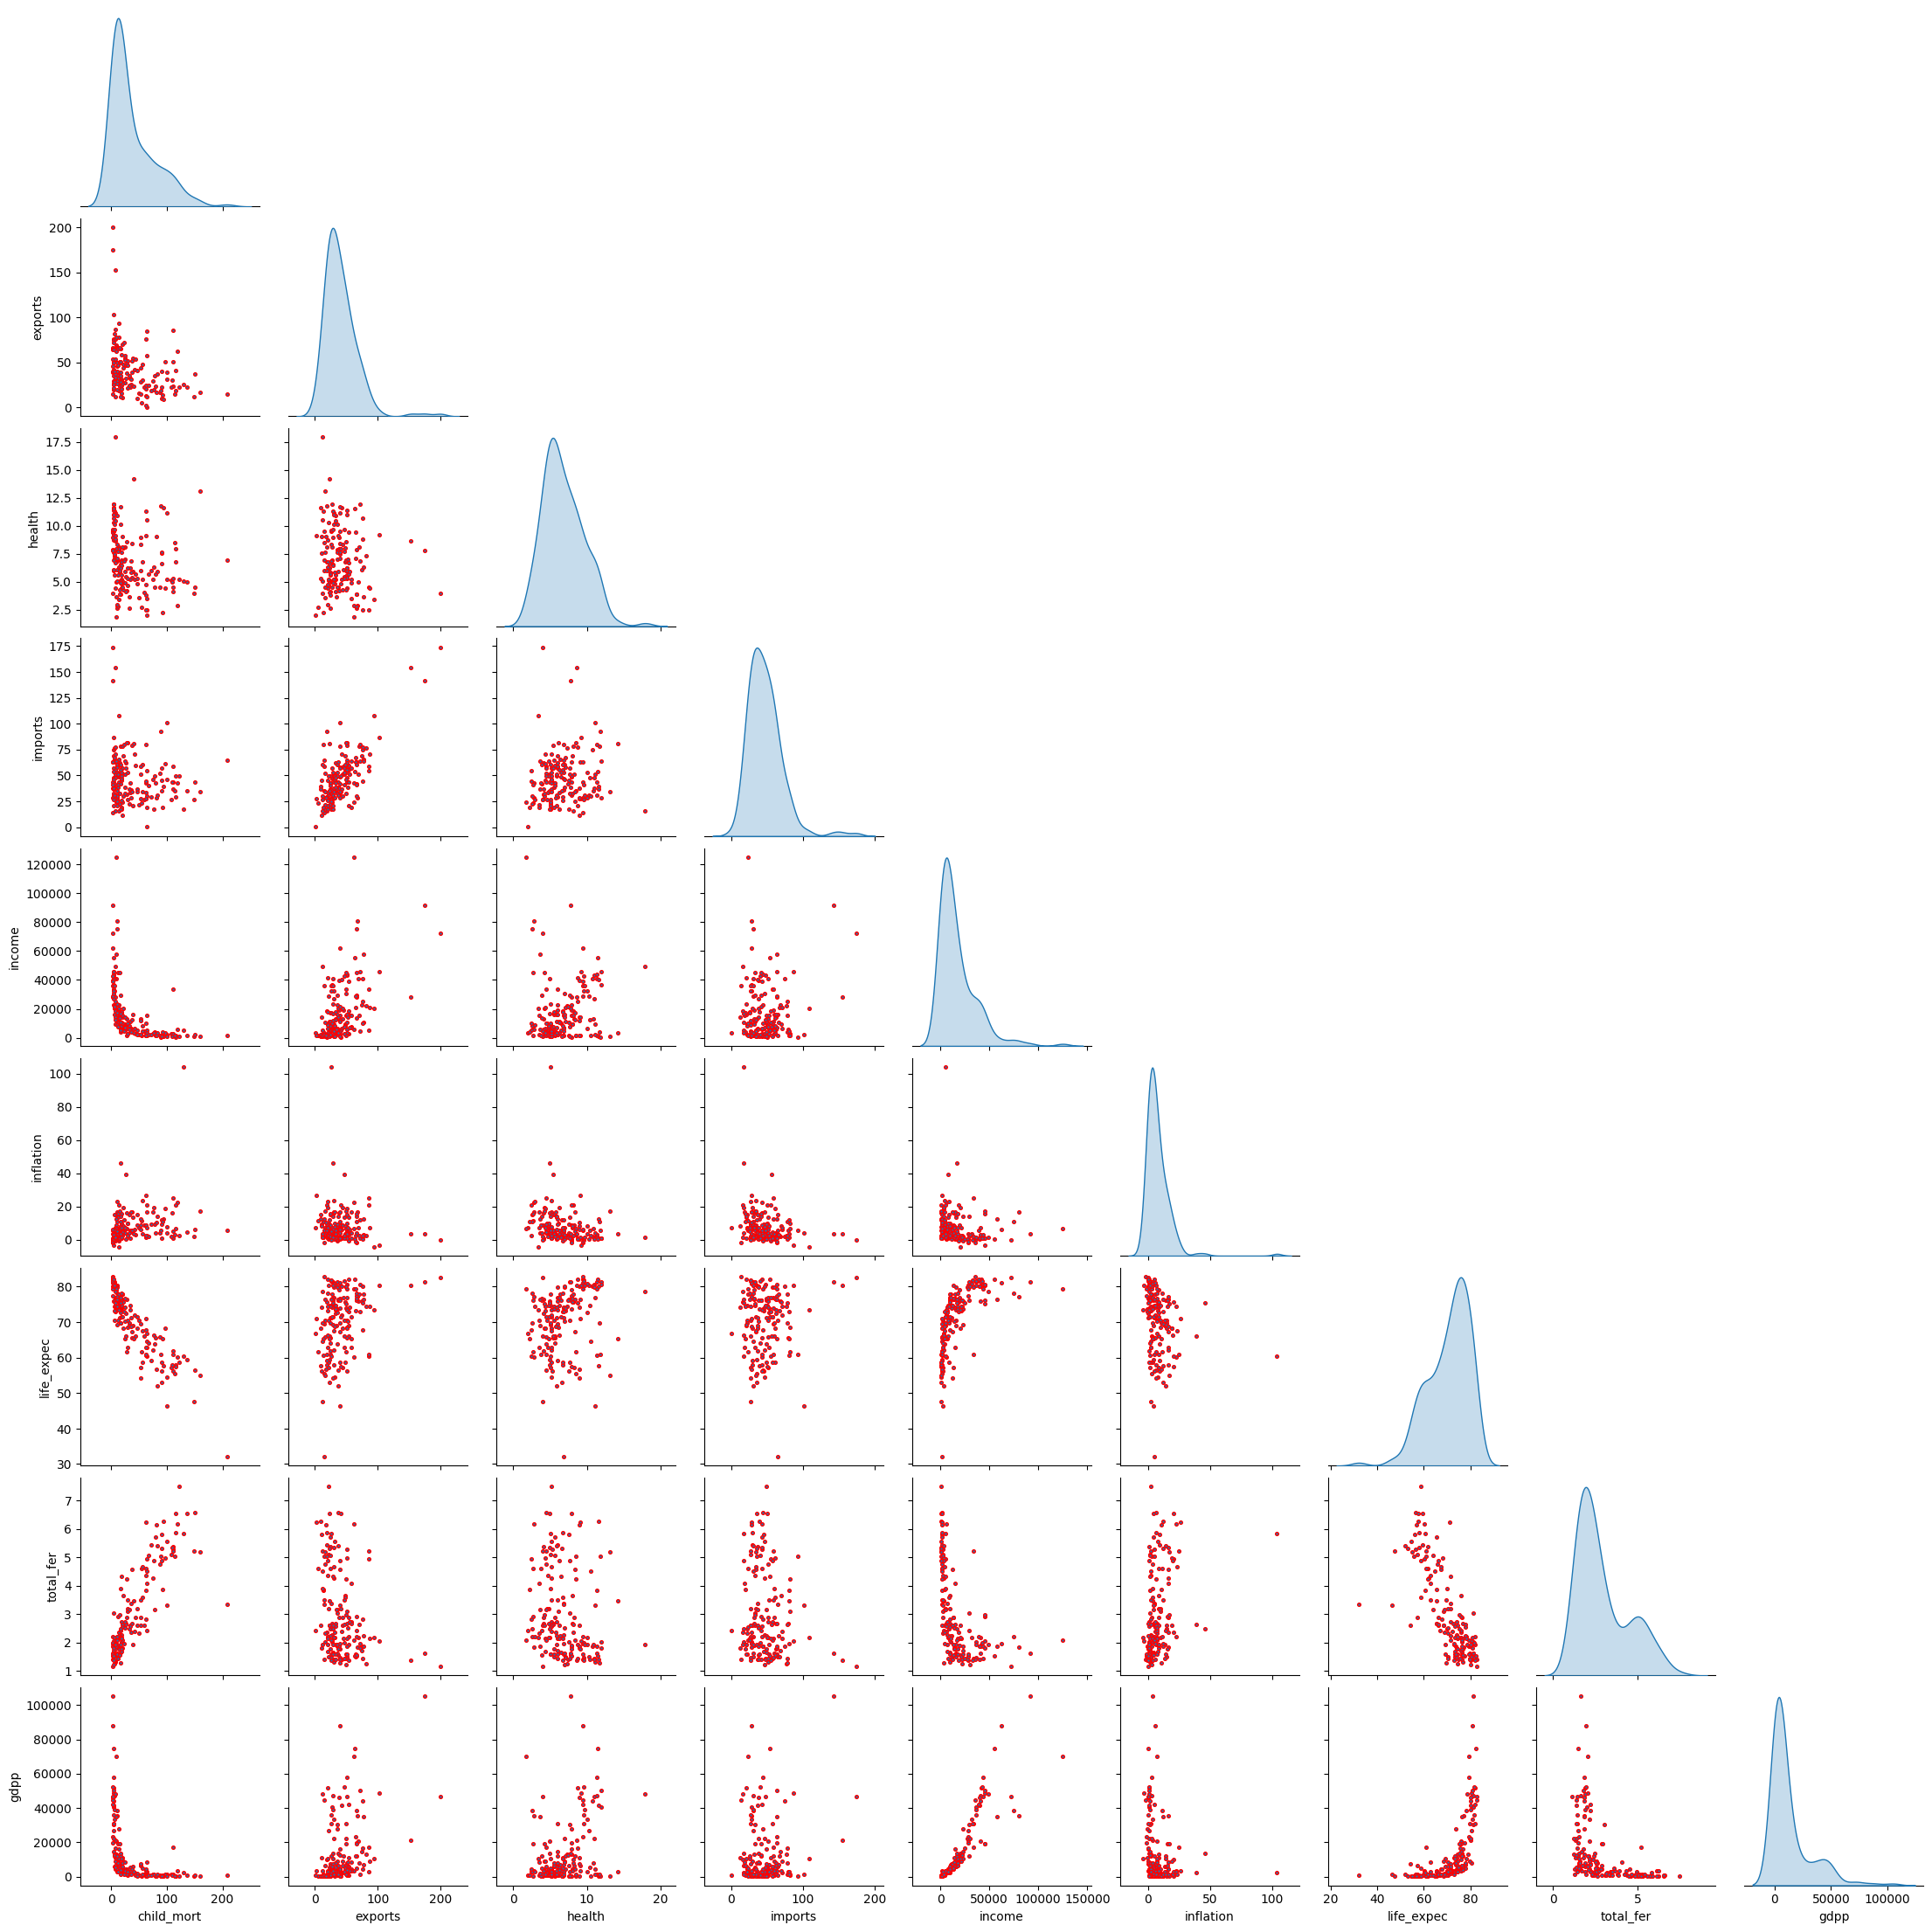

In [14]:
pair2=sns.pairplot(data,diag_kind='kde',corner=True,plot_kws=dict(s=7, edgecolor="r", linewidth=1))
pair2.savefig('pairplot.png')

<Axes: >

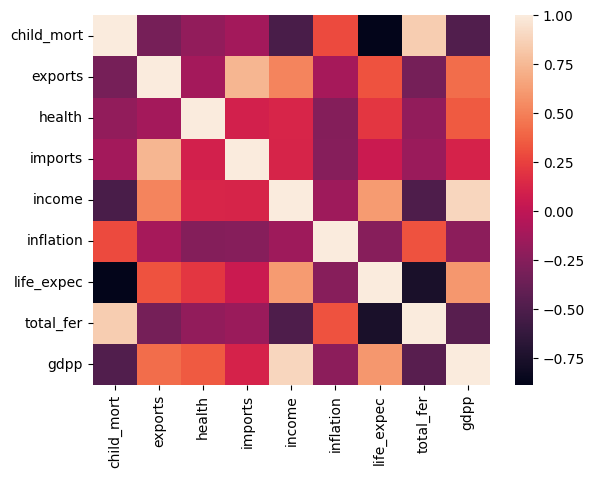

In [16]:
features = df.drop('country', axis=1)  
correlation = features.corr()  
sns.heatmap (correlation) 

In [17]:
np.linalg.eig(correlation)

(array([4.13565658, 1.54634631, 1.1703833 , 0.99478456, 0.66061903,
        0.22358112, 0.06687501, 0.08831536, 0.11343874]),
 array([[ 0.41951945, -0.19288394,  0.02954353, -0.37065326, -0.16896968,
         -0.20062815, -0.3275418 , -0.68274306, -0.07948854],
        [-0.28389698, -0.61316349, -0.14476069, -0.00309102,  0.05761584,
          0.05933283,  0.12308207, -0.01419742, -0.70730269],
        [-0.15083782,  0.24308678,  0.59663237, -0.4618975 ,  0.51800037,
         -0.00727646, -0.11308797,  0.07249683, -0.24983051],
        [-0.16148244, -0.67182064,  0.29992674,  0.07190746,  0.25537642,
          0.03003154, -0.09903717, -0.02894642,  0.59218953],
        [-0.39844111, -0.02253553, -0.3015475 , -0.39215904, -0.2471496 ,
         -0.16034699, -0.61298247,  0.35262369,  0.09556237],
        [ 0.19317293,  0.00840447, -0.64251951, -0.15044176,  0.7148691 ,
         -0.06628537,  0.02523614, -0.01153775,  0.10463252],
        [-0.42583938,  0.22270674, -0.11391854,  0.2037972

In [18]:
eigenvalues, eigenvectors = LA.eig(correlation)
np.sum(eigenvalues)

9.000000000000005

Text(0.5, 0, 'Dimensions')

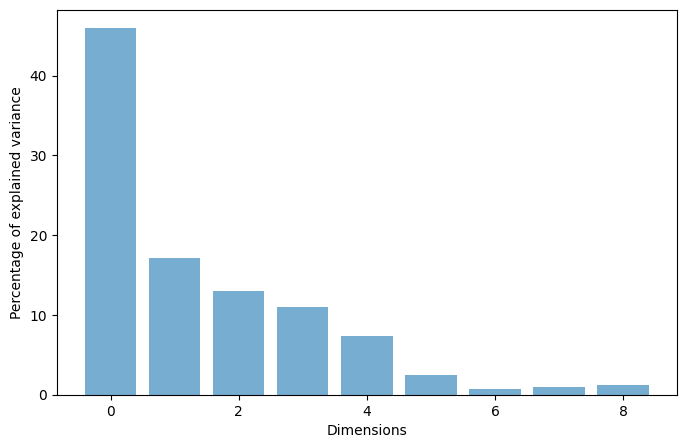

In [19]:
explained_variance=(eigenvalues / np.sum(eigenvalues))*100
plt.figure(figsize=(8,5))
plt.bar(range(9), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

In [20]:
pc1 = features_scaled.dot(eigenvectors[:,0]).reshape(-1, 1) 
pc2 = features_scaled.dot(eigenvectors[:,1]).reshape(-1, 1)

Text(0.5, 1.0, 'Scatter Plot of Principal Components')

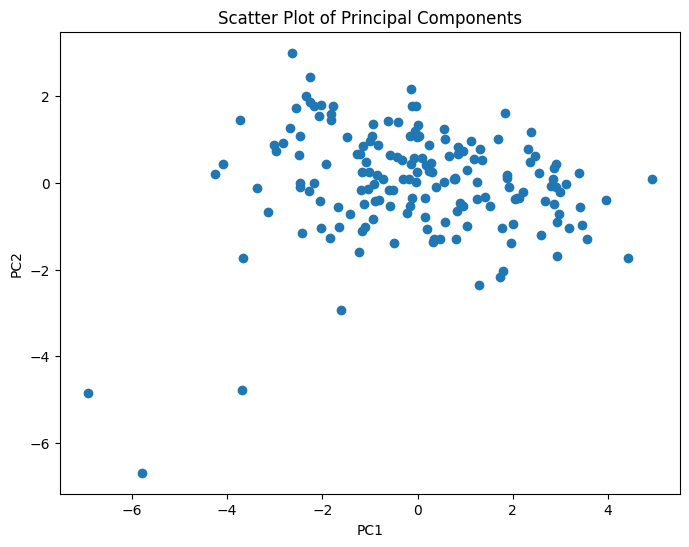

In [23]:
plt.figure(figsize=(8, 6))  
plt.scatter(pc1, pc2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatter Plot of Principal Components")

In [52]:
import sklearn.cluster as cluster
from tqdm import tqdm
inertia = []
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00, 20.21it/s]


In [55]:
from sklearn.metrics import silhouette_score

silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(features_scaled)
    silhouette[i] = silhouette_score(features_scaled, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:01<00:00,  7.95it/s]


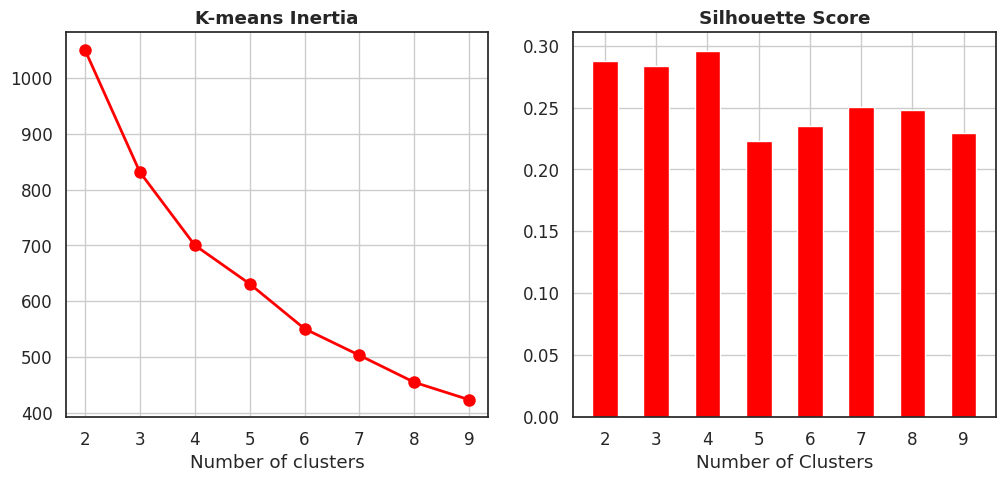

In [56]:
sns.set(style='white',font_scale=1.1, rc={'figure.figsize':(12,5)})

plt.subplot(1, 2, 1)

plt.plot(range(2,len(inertia)+2), inertia, marker='o',lw=2,ms=8,color='red')
plt.xlabel('Number of clusters')
plt.title('K-means Inertia',fontweight='bold')
plt.grid(True)

plt.subplot(1, 2, 2)

plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'red',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score',fontweight='bold')
plt.xlabel('Number of Clusters')


plt.show()


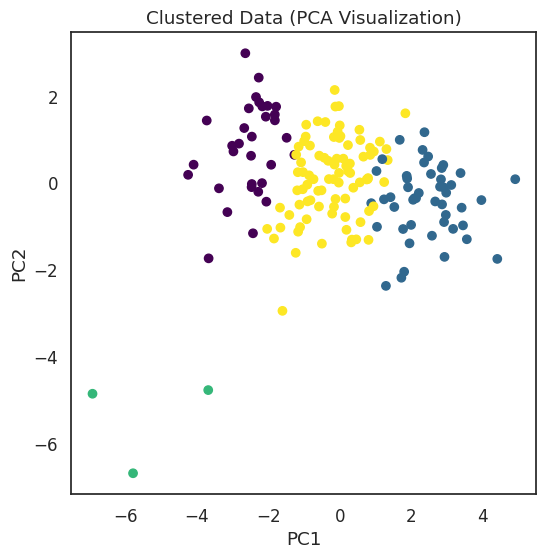

In [91]:
optimal_k = 4
kmeans = cluster.KMeans(n_clusters=optimal_k,
                         init='k-means++',
                         n_init=15,
                         max_iter=500,
                         random_state=17)
kmeans.fit(features_scaled)
cluster_labels = kmeans.labels_

plt.figure(figsize=(6, 6))
plt.scatter(pc1, pc2, c=cluster_labels, cmap='viridis')  

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clustered Data (PCA Visualization)")

plt.show()

In [92]:
from sklearn.metrics import silhouette_score

final_silhouette_score = silhouette_score(features_scaled, cluster_labels, metric='euclidean')
print("Final Silhouette Score:", final_silhouette_score)

Final Silhouette Score: 0.29595170577528157
